## Classification Example
### from Geron, 2nd Edition, chapter 10

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [2]:
keras.__version__

'2.4.0'

In [3]:
tf.random.set_seed(1234)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9681 - accuracy: 0.6899 - val_loss: 0.5056 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5039 - accuracy: 0.8215 - val_loss: 0.4478 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.8417 - val_loss: 0.4377 - val_accuracy: 0.8440
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4172 - accuracy: 0.8539 - val_loss: 0.3943 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3879 - accuracy: 0.8619 - val_loss: 0.3959 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3878 - accuracy: 0.8645 - val_loss: 0.3860 - val_accuracy: 0.8648
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8702 - val_loss: 0.3697 - val_accuracy:

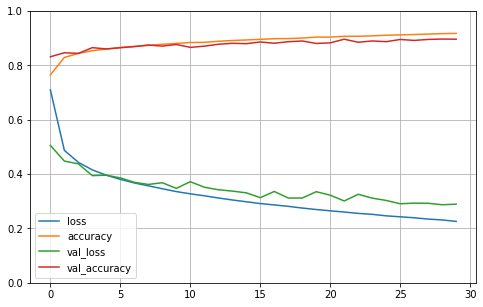

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 984us/step - loss: 0.3281 - accuracy: 0.8827


[0.32810842990875244, 0.8827000260353088]

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)